## Imported required modules

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Imported the data


In [98]:
obesity_data = pd.read_csv('data.csv')
obesity_data.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


## Performed some cleaning on the data

In [145]:
df = obesity_data.copy()
df.rename(columns = {'Unnamed: 0':'Country'},inplace = True)
df = df.melt(id_vars = ['Country'],var_name = 'year')
df = df.drop([0,1,2]).reset_index()
df.drop(['index'],axis = 1,inplace = True)
df[['year','gender']] = df['year'].str.split('.',expand = True)
df['gender'] = df['gender'].map({None:'Both gender','1':'Male','2':'Female'})
df.rename(columns = {'value':'BMI'},inplace=True)
df1 = df.copy()
df['BMI'] = df1['BMI'].str.split('[',expand = True)[0]
df.dropna(how = 'all',inplace =True)

## Plotting the data

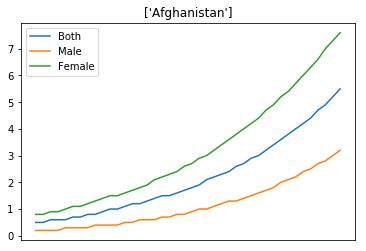

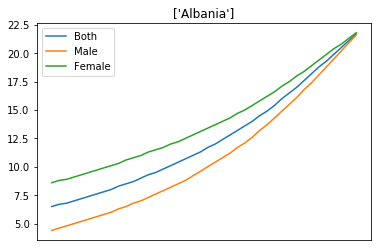

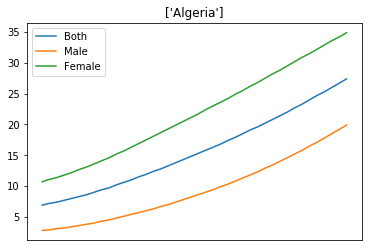

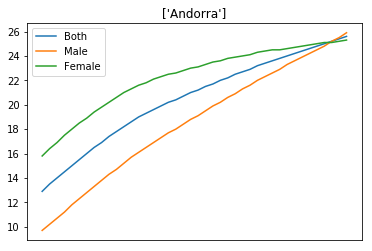

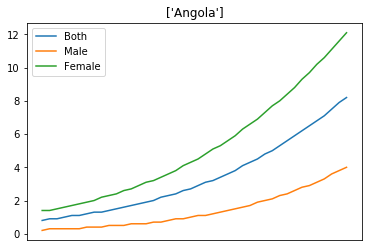

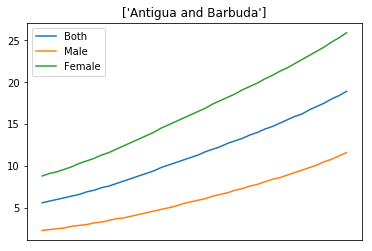

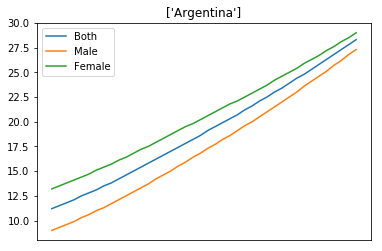

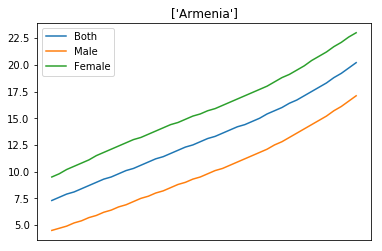

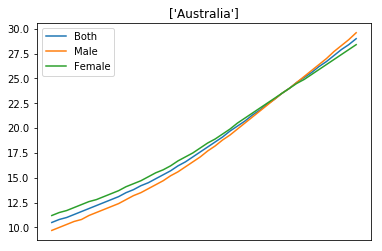

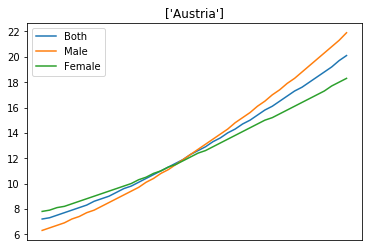

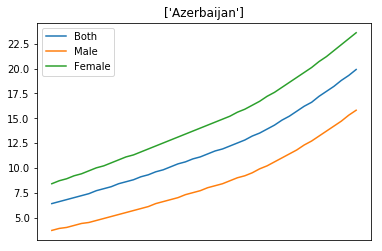

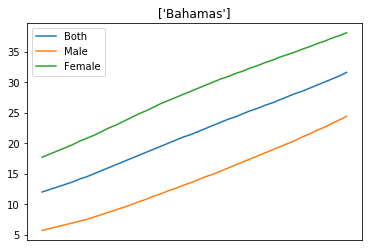

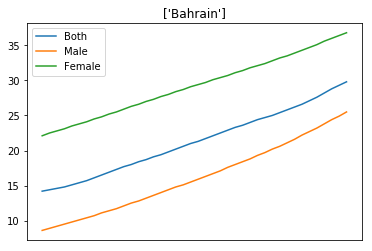

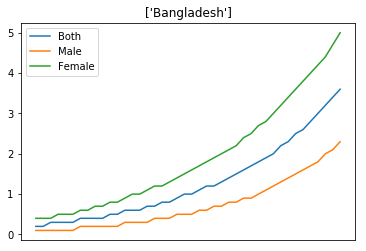

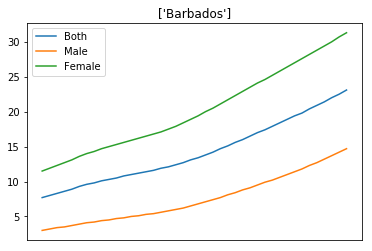

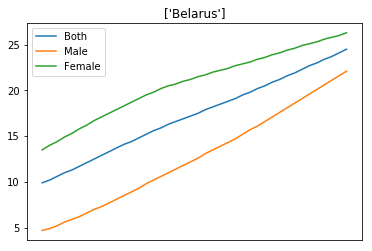

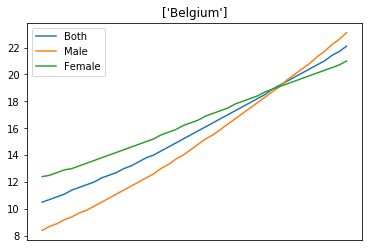

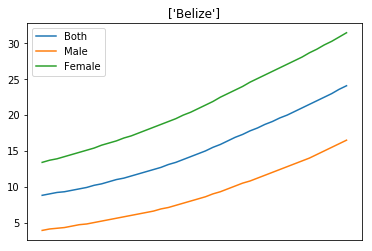

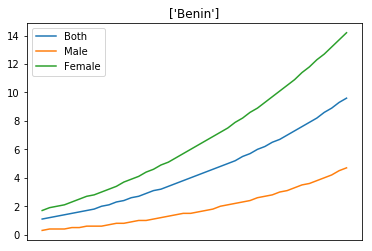

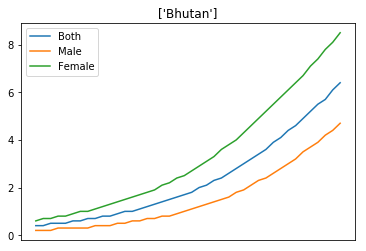

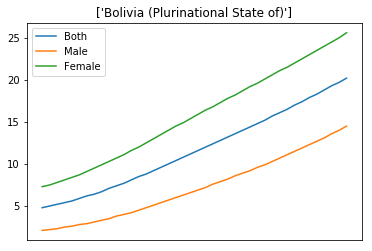

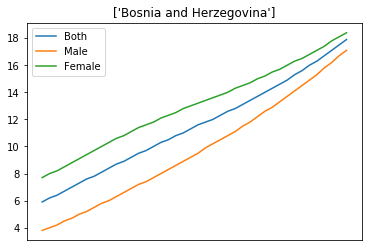

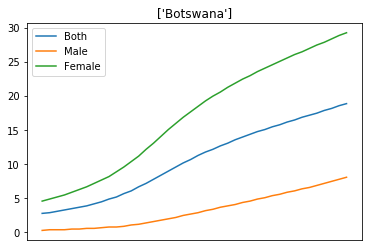

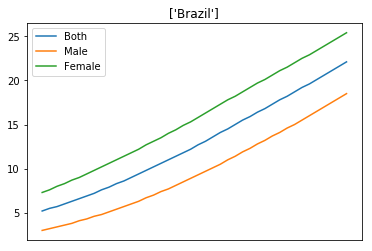

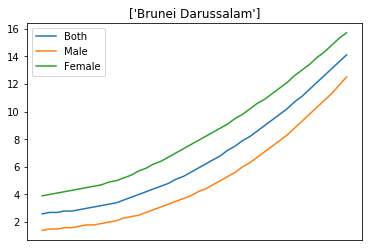

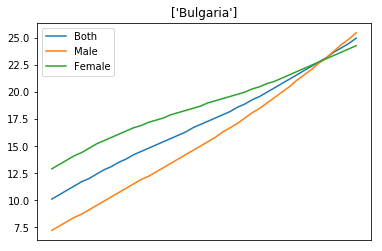

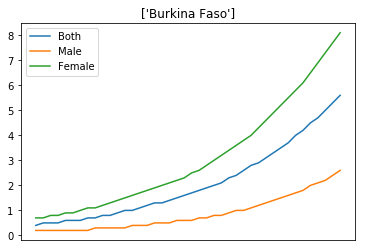

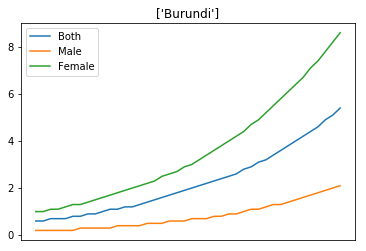

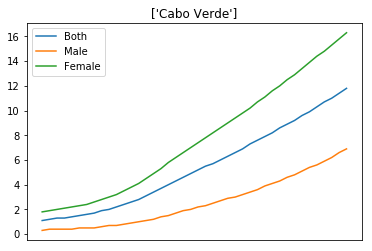

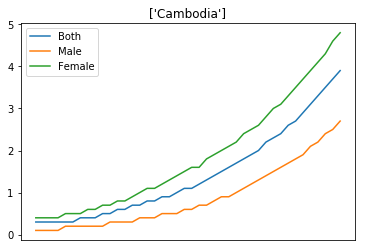

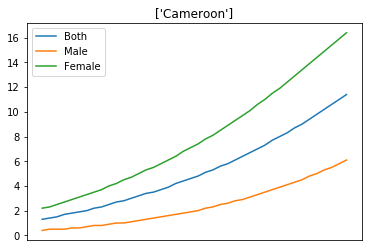

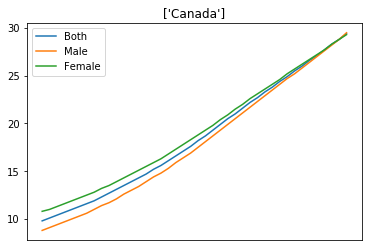

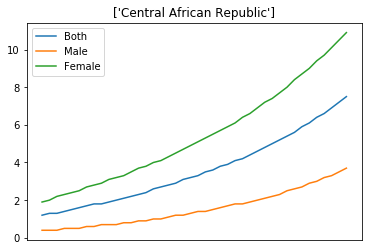

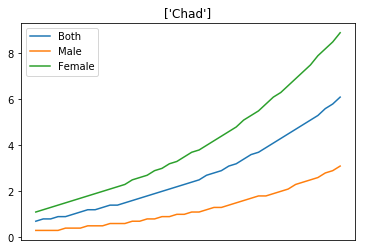

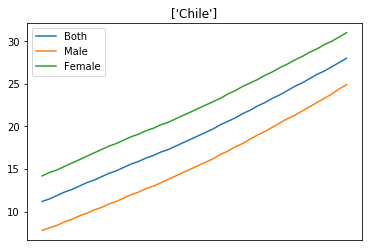

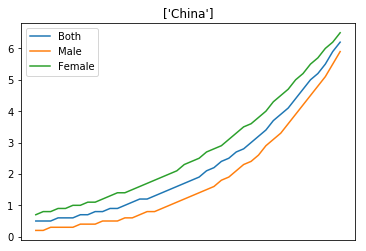

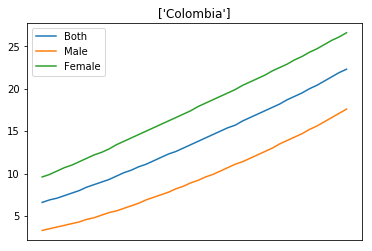

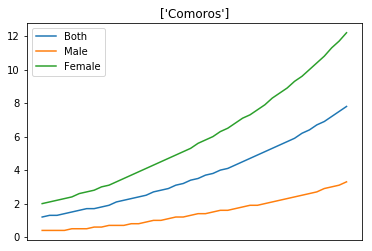

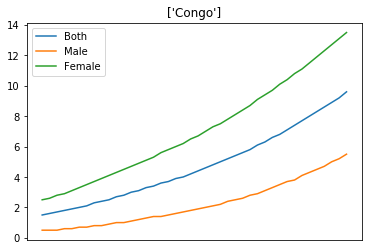

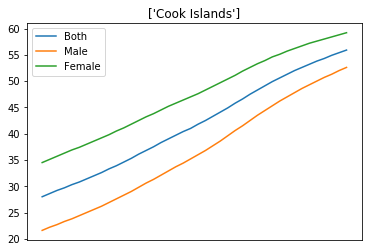

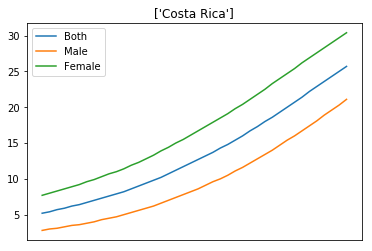

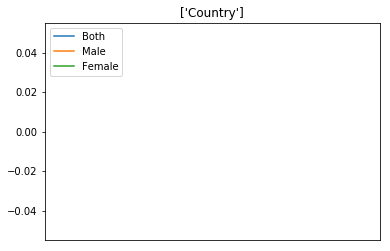

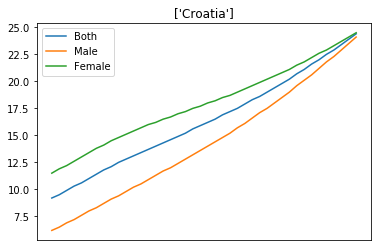

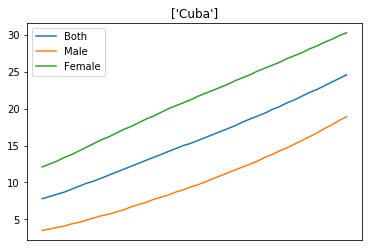

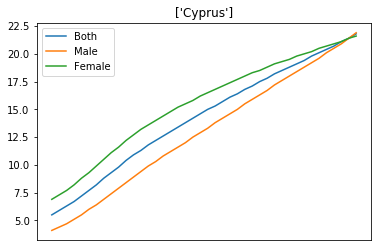

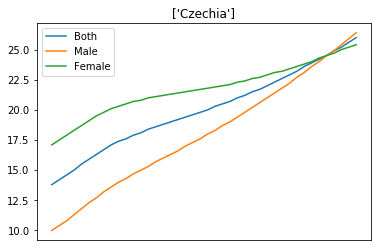

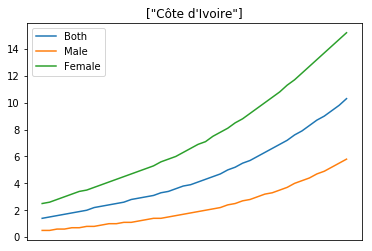

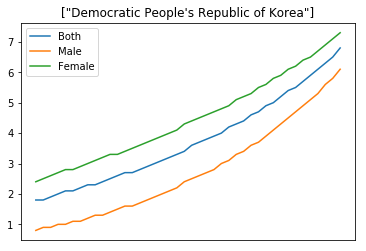

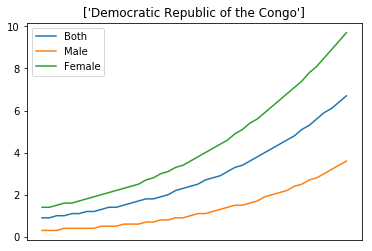

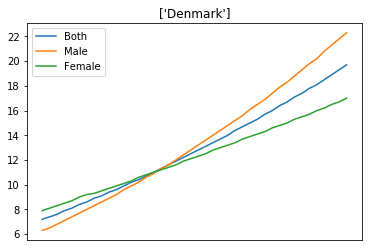

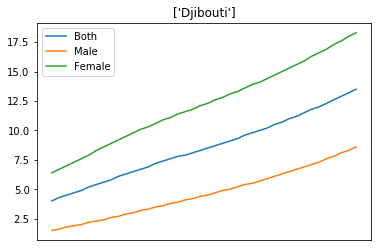

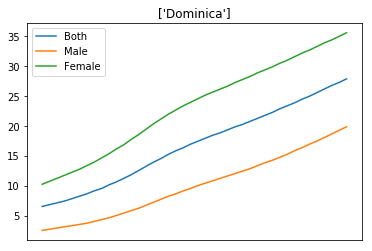

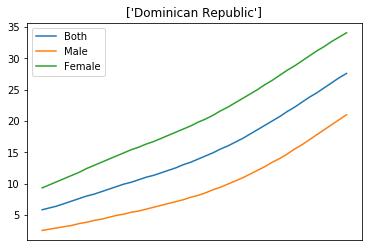

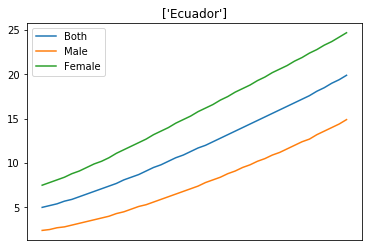

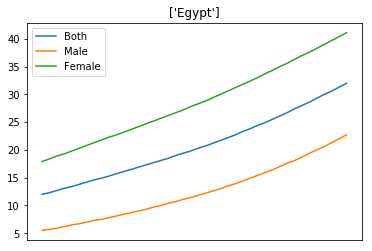

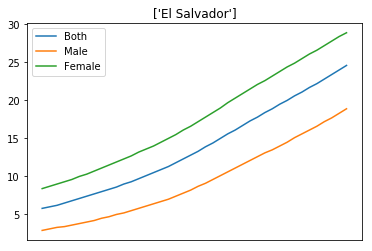

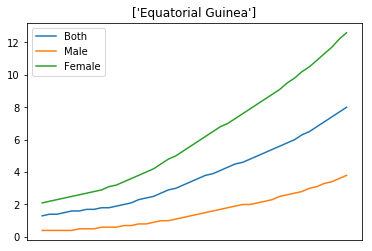

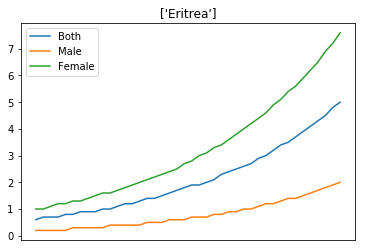

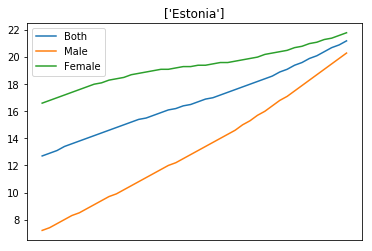

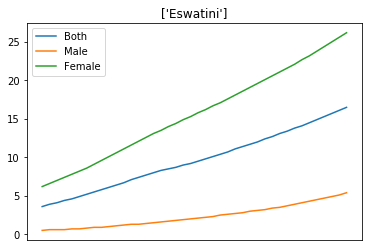

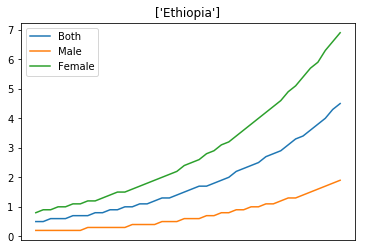

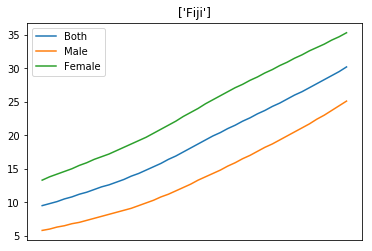

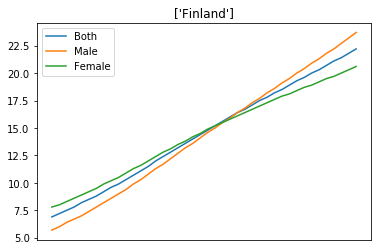

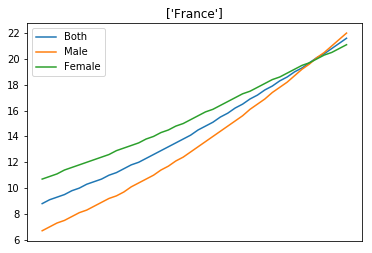

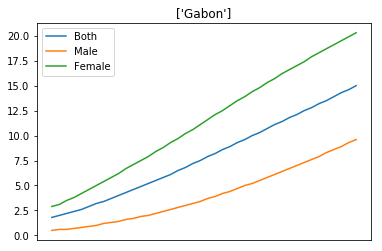

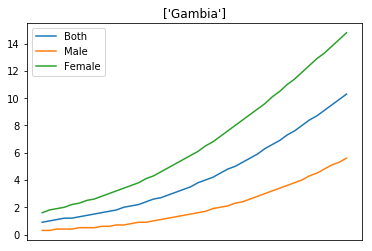

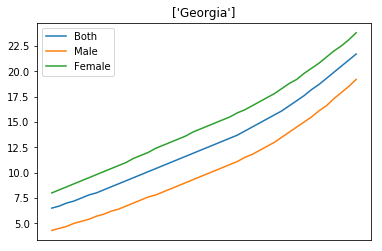

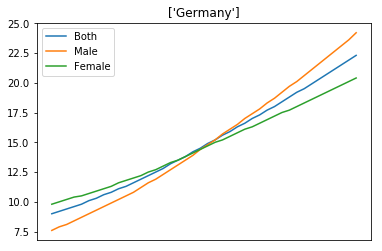

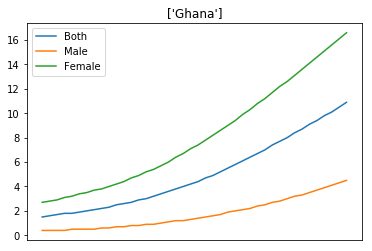

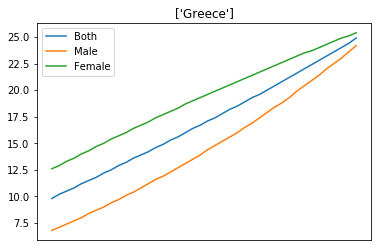

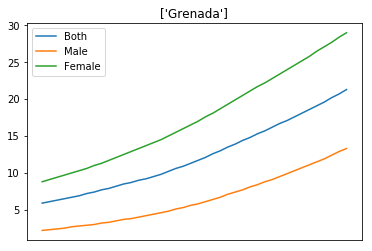

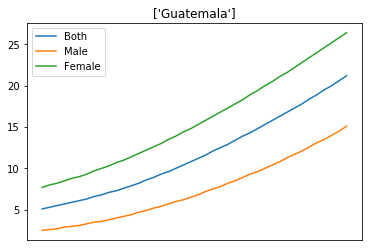

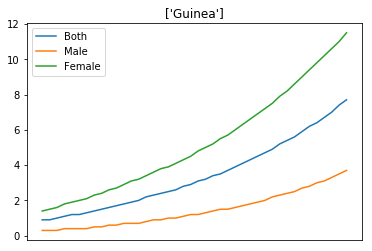

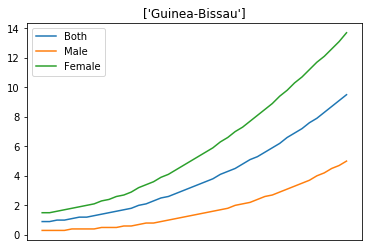

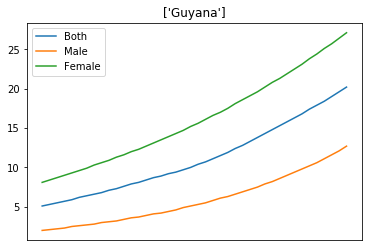

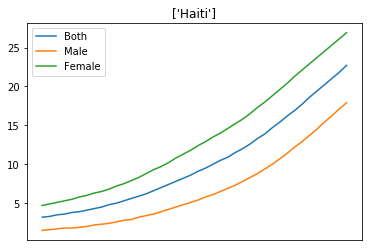

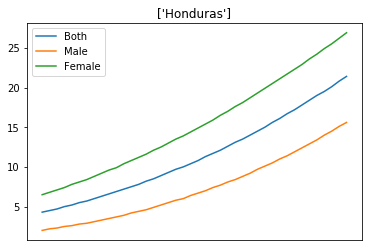

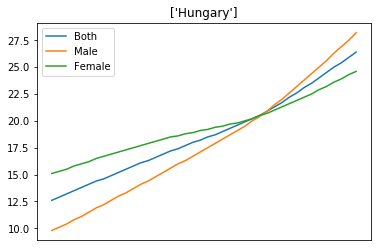

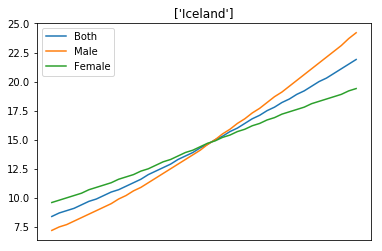

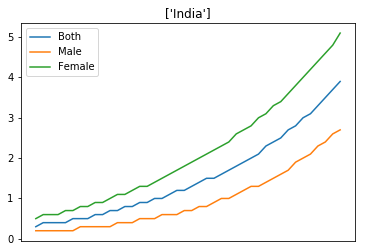

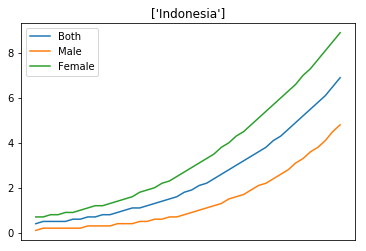

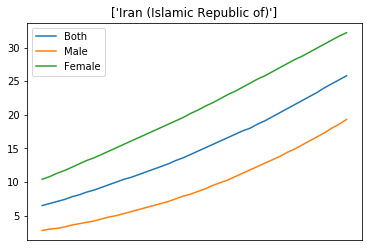

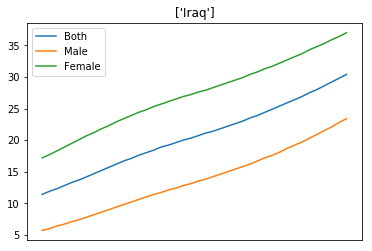

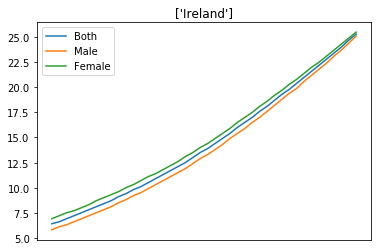

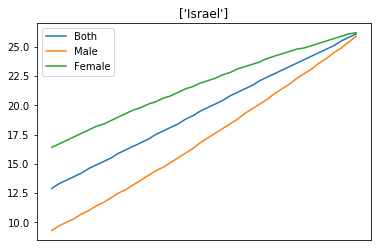

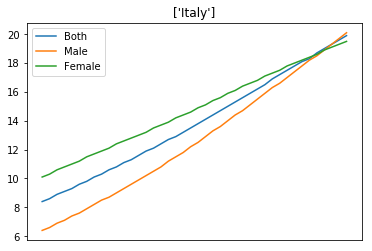

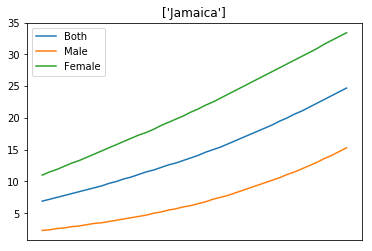

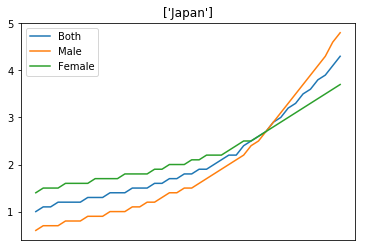

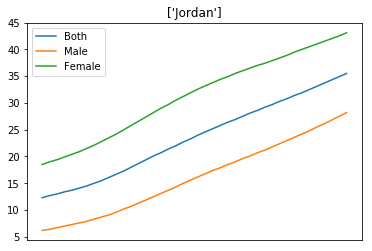

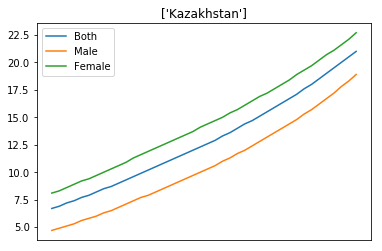

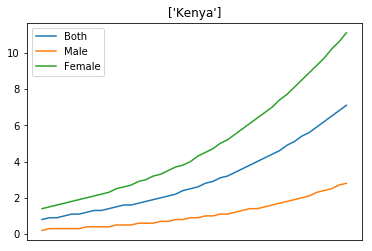

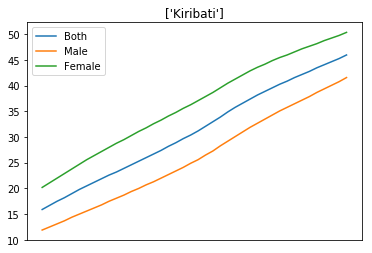

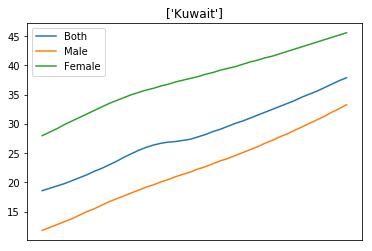

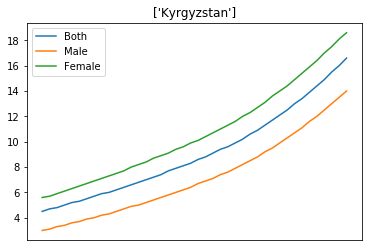

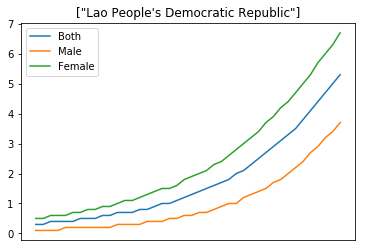

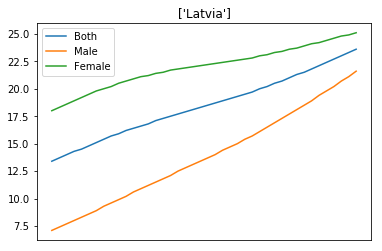

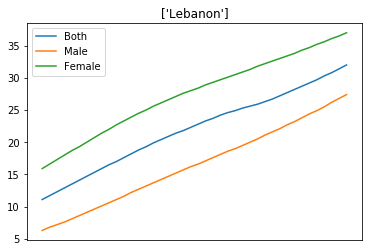

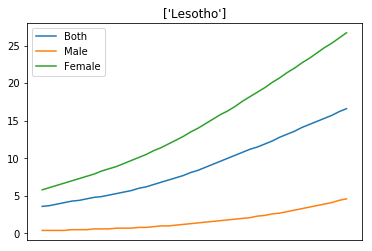

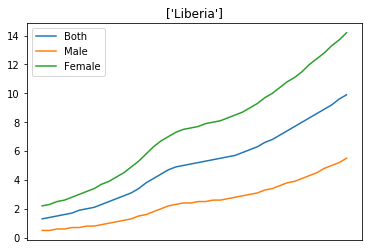

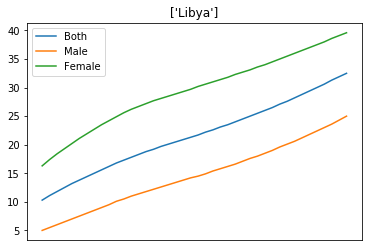

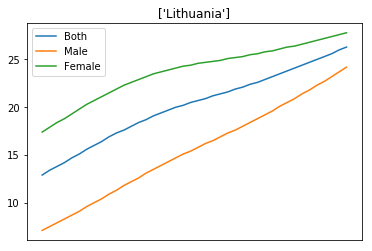

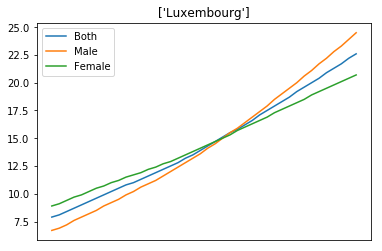

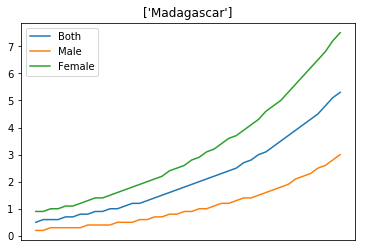

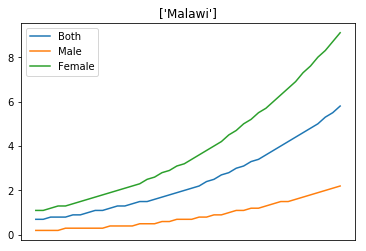

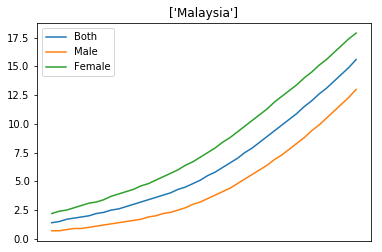

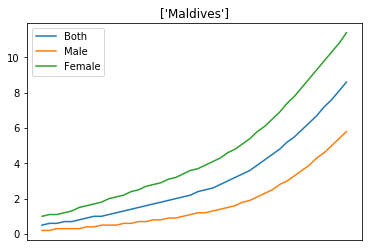

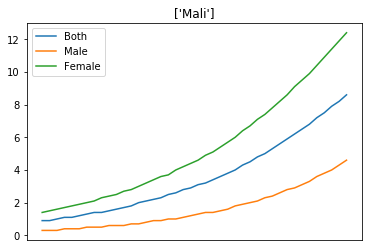

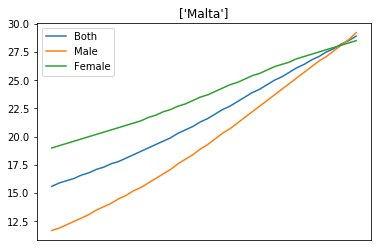

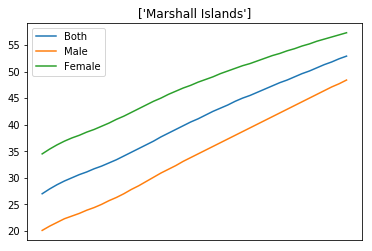

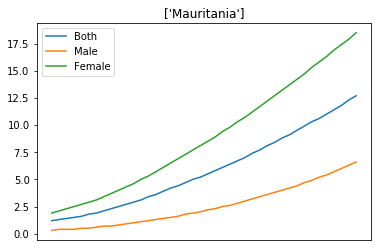

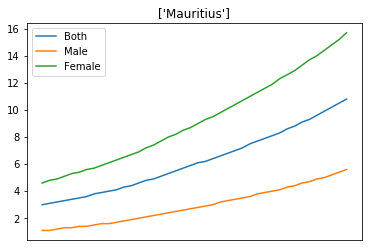

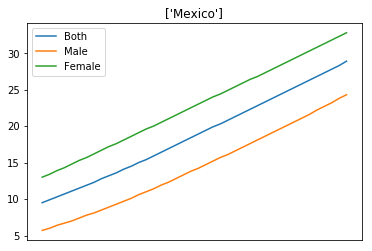

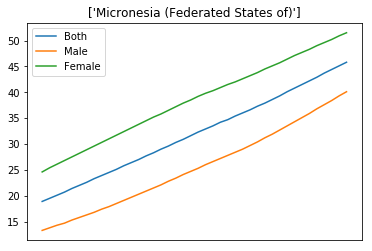

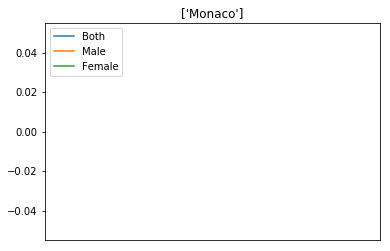

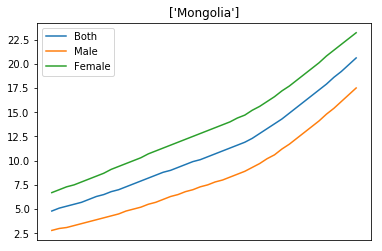

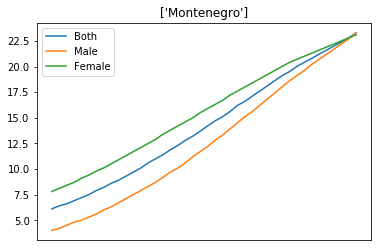

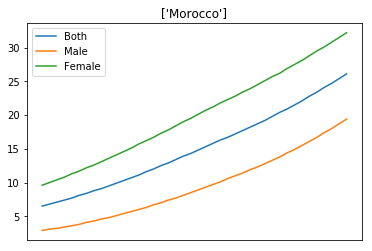

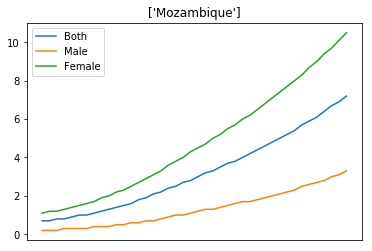

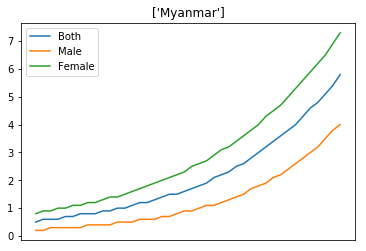

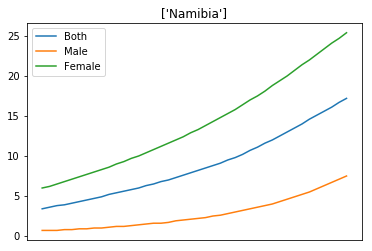

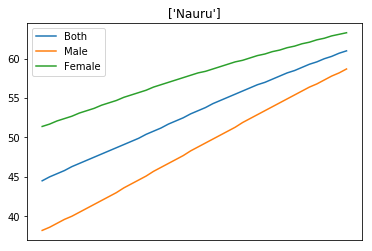

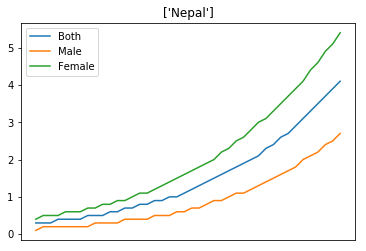

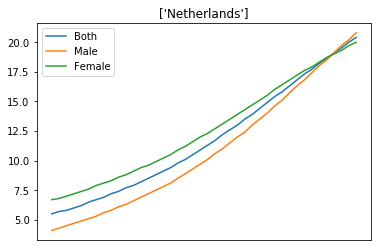

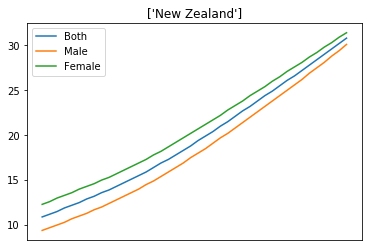

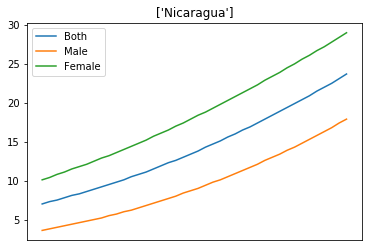

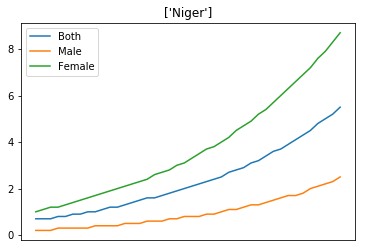

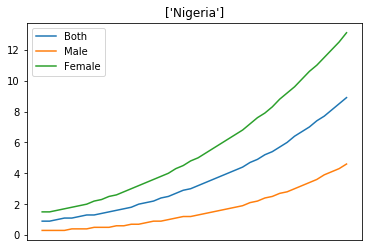

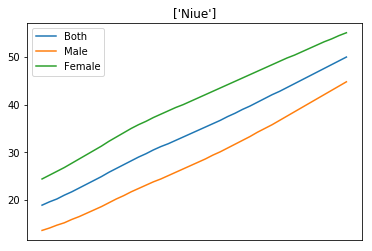

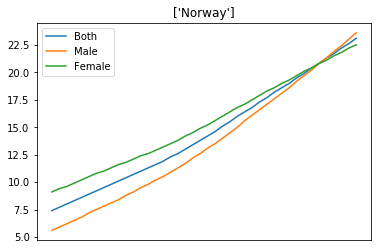

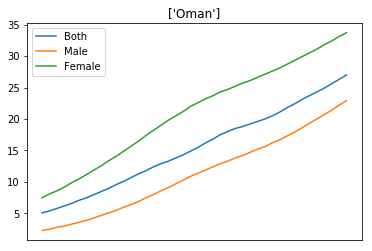

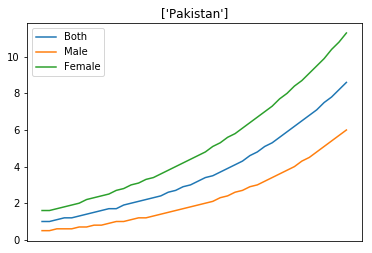

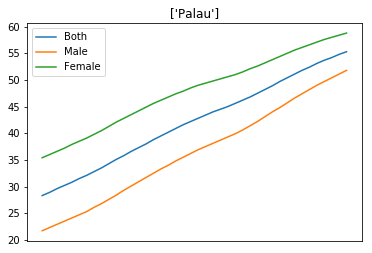

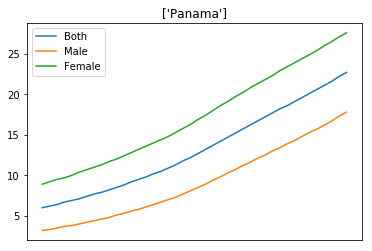

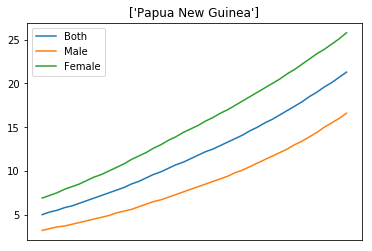

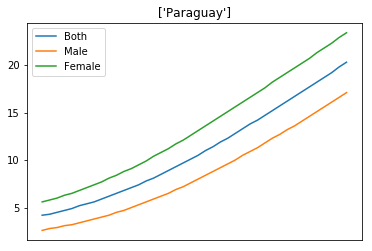

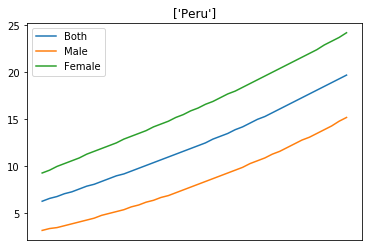

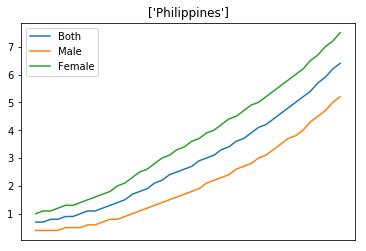

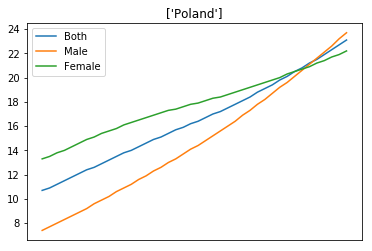

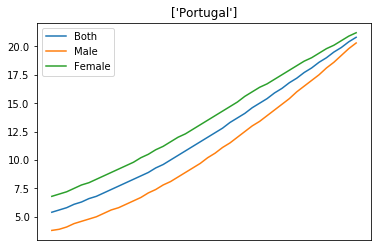

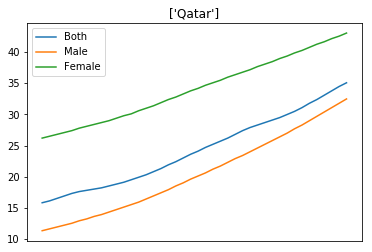

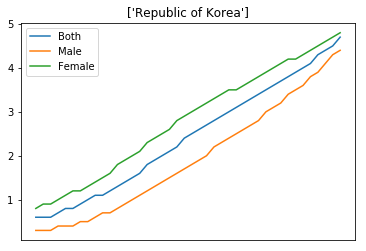

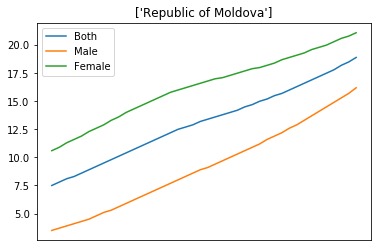

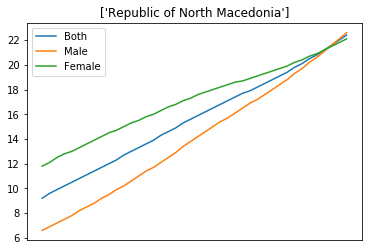

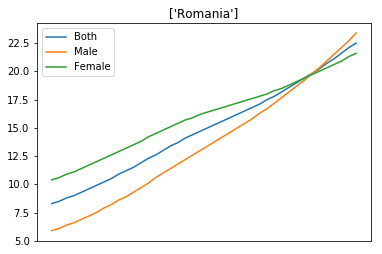

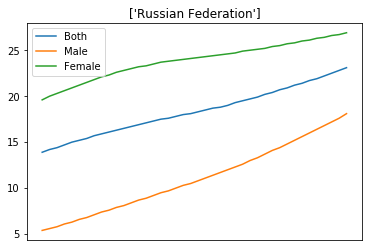

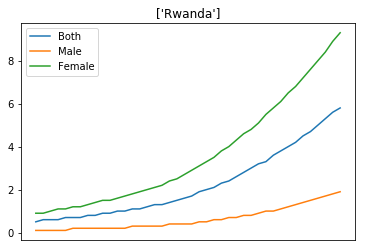

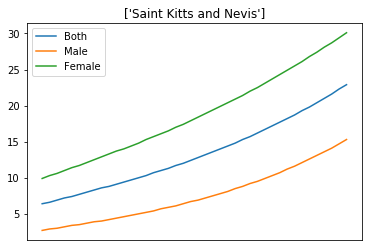

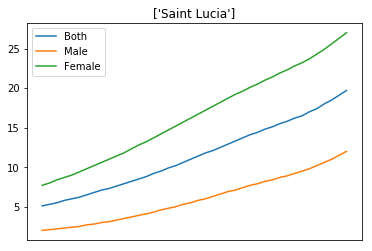

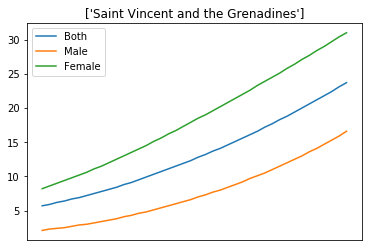

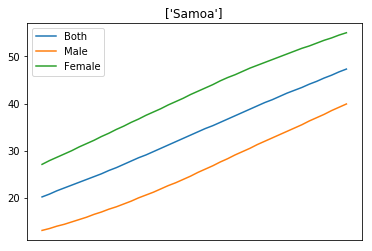

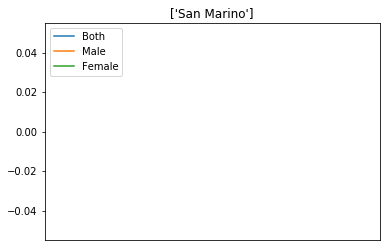

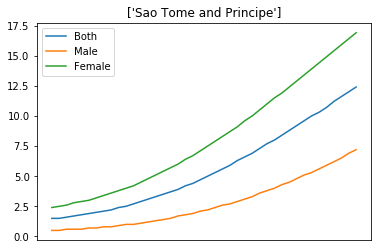

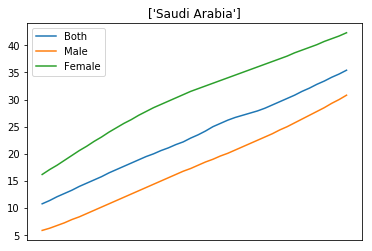

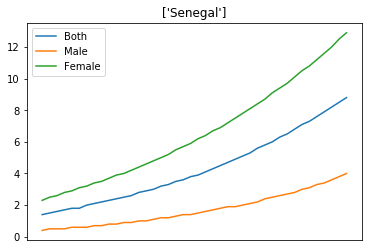

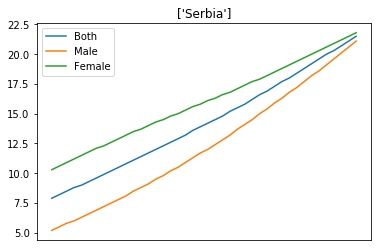

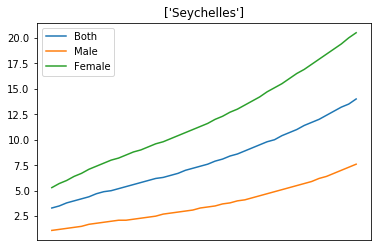

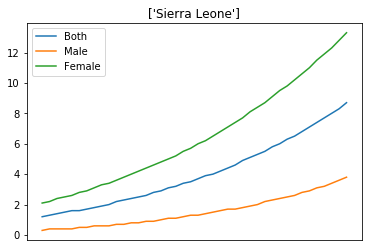

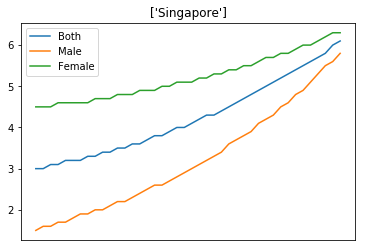

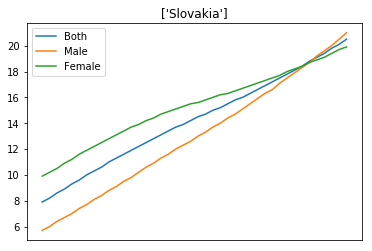

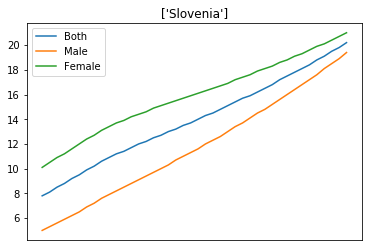

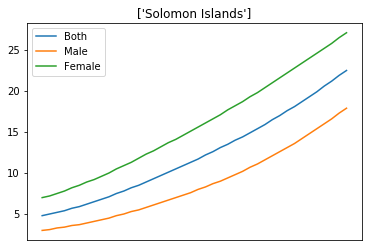

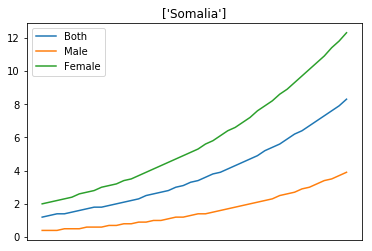

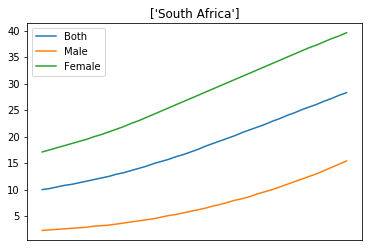

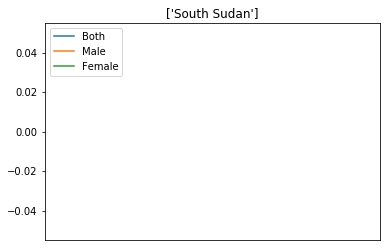

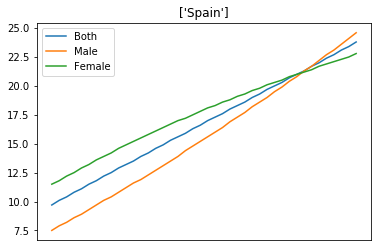

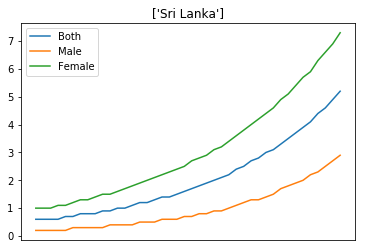

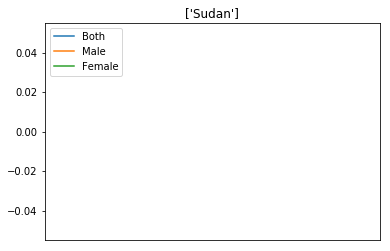

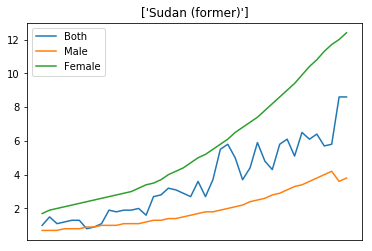

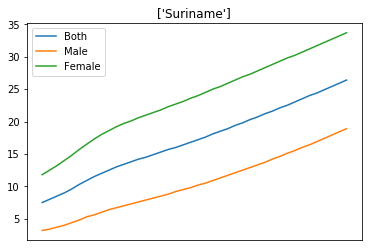

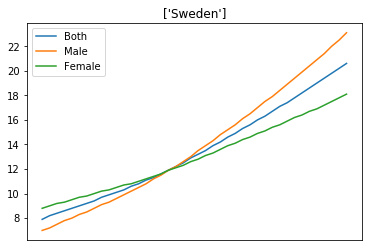

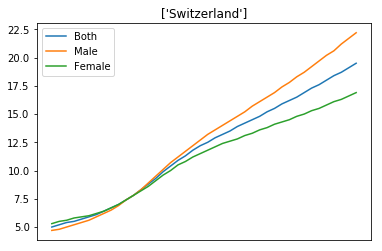

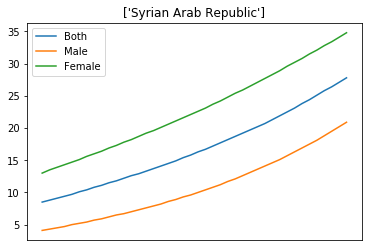

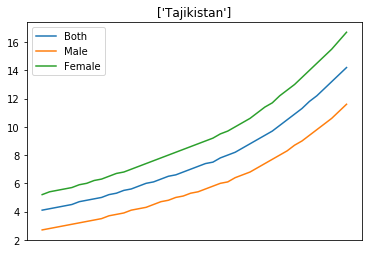

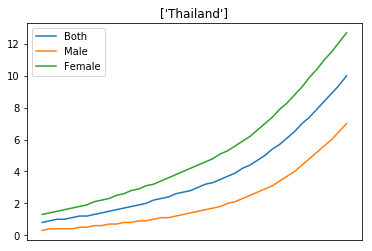

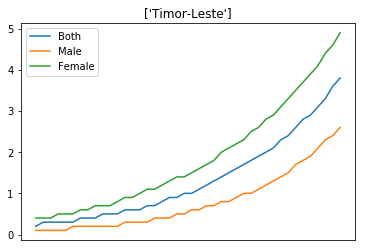

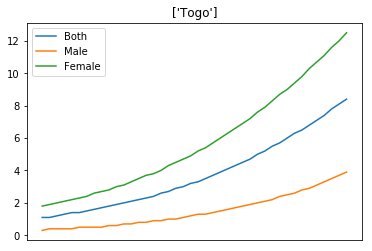

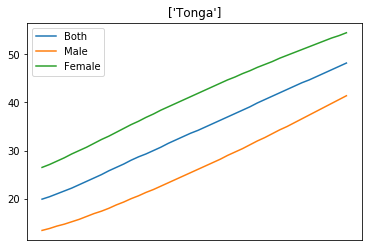

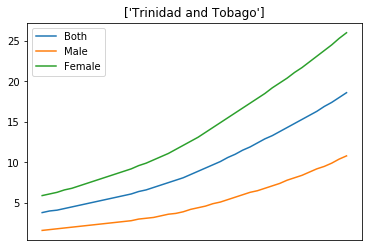

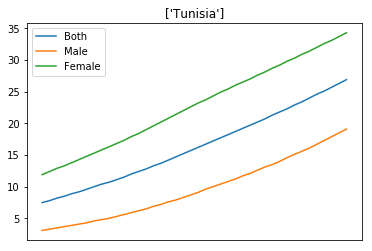

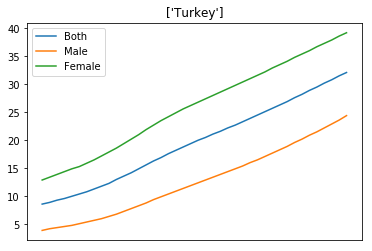

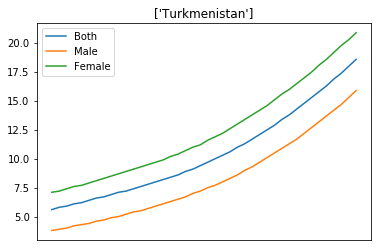

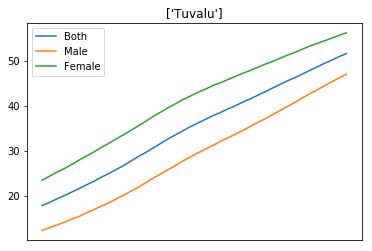

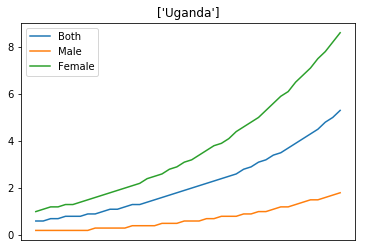

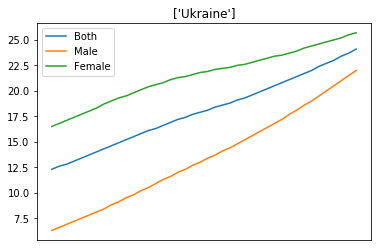

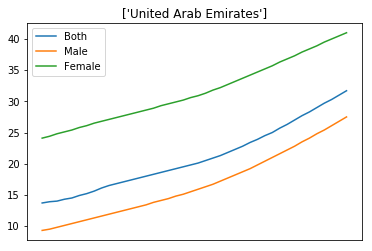

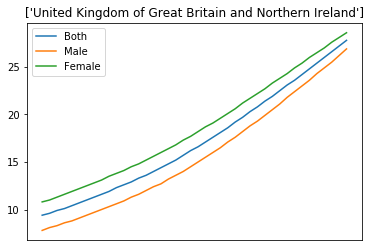

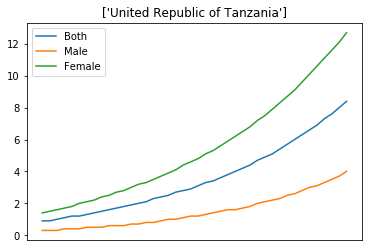

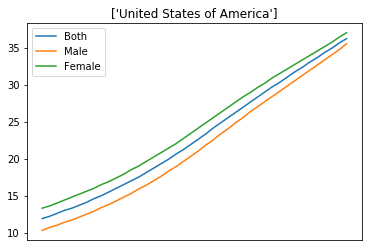

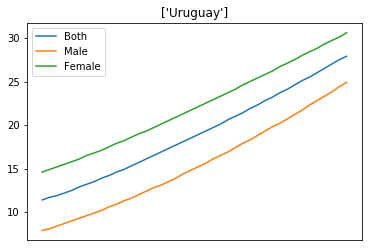

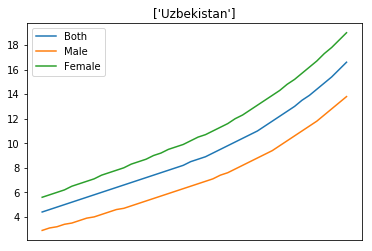

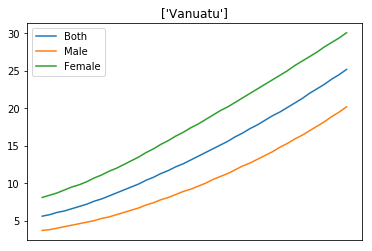

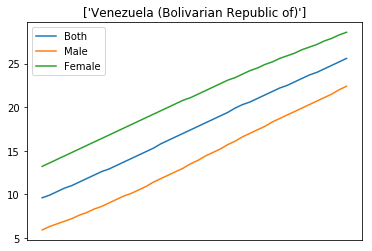

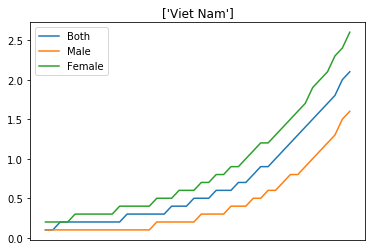

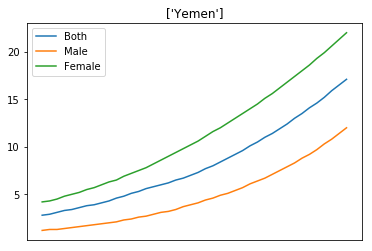

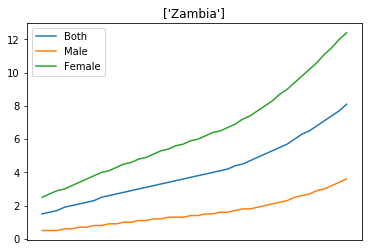

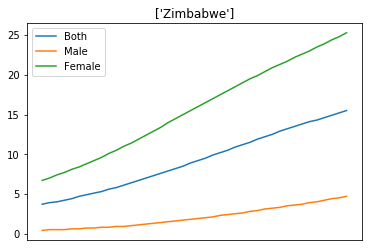

In [144]:
obesity_both = df[df['gender'] == 'Both gender']
obesity_male = df[df['gender'] == 'Male']
obesity_female = df[df['gender'] == 'Female']
obesity_both_group = obesity_both.groupby('Country')
obesity_male_group = obesity_male.groupby('Country')
obesity_female_group = obesity_female.groupby('Country')
cont = obesity_both_group['Country'].unique()
for ctry in cont:
    a1 = obesity_both_group.get_group(ctry[0])
    b1 = pd.to_numeric(a1['BMI'],errors = 'coerce')
    yr1 = a1['year']
    plt.plot(yr1,b1,label='Both')
    a2 = obesity_male_group.get_group(ctry[0])
    b2 = pd.to_numeric(a2['BMI'],errors = 'coerce')
    yr2 = a2['year']
    plt.plot(yr2,b2,label='Male')
    a3 = obesity_female_group.get_group(ctry[0])
    b3 = pd.to_numeric(a3['BMI'],errors = 'coerce')
    yr3 = a3['year']
    plt.plot(yr3,b3,label='Female')
    plt.xticks([])
    plt.title(ctry)
    plt.legend(loc = 'upper left')
    plt.show()
